In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
a1 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha1.0_sample10K.csv')
a09 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.9_sample10K.csv')
a07 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.7_sample10K.csv')
a05 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.5_sample10K.csv')
a03 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.3_sample10K.csv')
a0 = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.0_sample10K.csv')


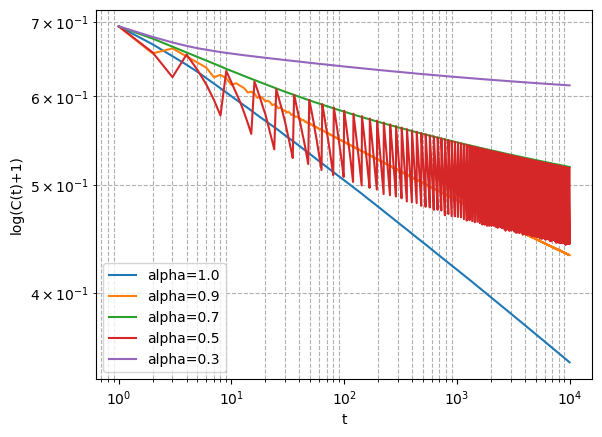

In [3]:
plt.loglog(a1['t'], np.log(a1['Ct']+1), label='alpha=1.0')
plt.loglog(a09['t'], np.log(a09['Ct']+1), label='alpha=0.9')
plt.loglog(a07['t'], np.log(a07['Ct']+1), label='alpha=0.7')
plt.loglog(a05['t'], np.log(a05['Ct']+1), label='alpha=0.5')
plt.loglog(a03['t'], np.log(a03['Ct']+1), label='alpha=0.3')
# plt.loglog(a0['t'], np.log(a0['Ct']+1), label='alpha=0.0')
plt.xlabel('t')
plt.ylabel('log(C(t)+1)')
# plt.ylim(1e-1, 1)
plt.legend()
plt.yticks(minor=True)
plt.grid(axis='both', which='minor', linestyle='--')


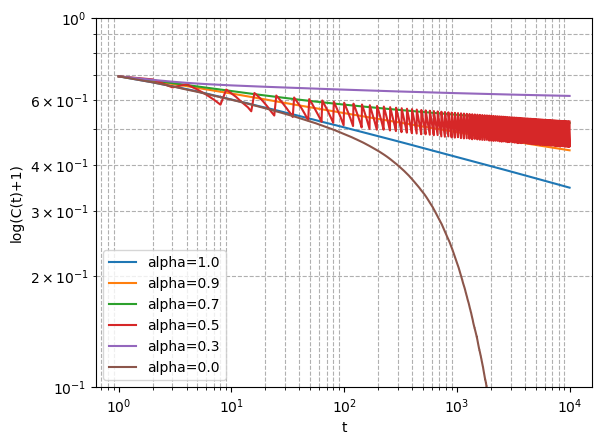

In [22]:
plt.loglog(a1['t'], np.log(a1['Ct']+1), label='alpha=1.0')
plt.loglog(a09['t'], np.log(a09['Ct']+1), label='alpha=0.9')
plt.loglog(a07['t'], np.log(a07['Ct']+1), label='alpha=0.7')
plt.loglog(a05['t'], np.log(a05['Ct']+1), label='alpha=0.5')
plt.loglog(a03['t'], np.log(a03['Ct']+1), label='alpha=0.3')
plt.loglog(a0['t'], np.log(a0['Ct']+1), label='alpha=0.0')
plt.xlabel('t')
plt.ylabel('log(C(t)+1)')
plt.ylim(1e-1, 1)
plt.legend()
plt.yticks(minor=True)
plt.grid(axis='both', which='minor', linestyle='--')


In [4]:
df = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha1.0_sample10K.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.950050
2,3,0.918867
3,4,0.897000
4,5,0.879440


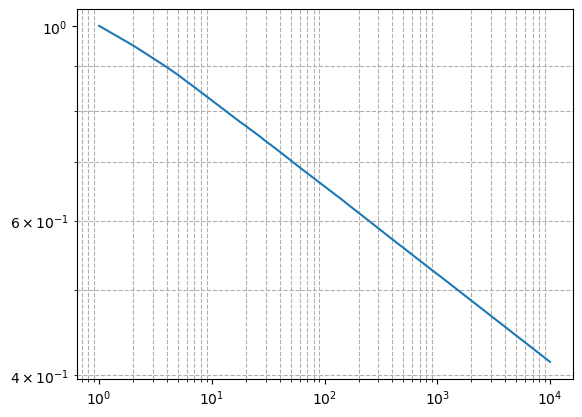

In [7]:
plt.loglog(df['t'], df['Ct'])
plt.yticks(minor=True)
plt.xticks(minor=True)
plt.grid(axis='both', which='minor', linestyle='--')
plt.savefig('figs/Ct.png')
# plt.close()


figs/Ct.pngの表示
![Ct.png](figs/Ct.png)

In [9]:
df = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.0_sample10K.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.949851
2,3,0.917984
3,4,0.893526
4,5,0.876485


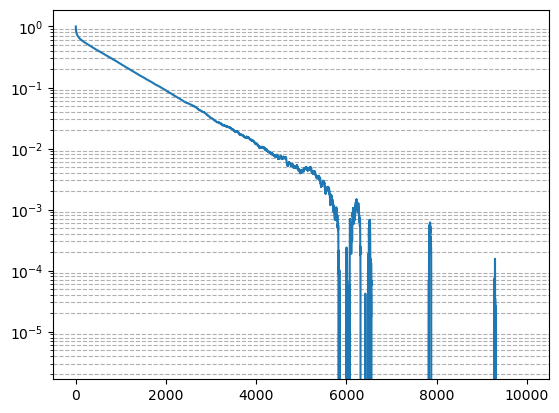

In [10]:
plt.plot(df['t'], df['Ct'])
plt.yscale('log')
plt.xticks(minor=True)
plt.grid(axis='both', which='minor', linestyle='--')
plt.savefig('figs/Ct_a_0.png')
# plt.close()


![Ct_a_0.png](figs/Ct_a_0.png)

In [12]:
df = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.9_sample10K.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.961055
2,3,0.937094
3,4,0.919020
4,5,0.905286


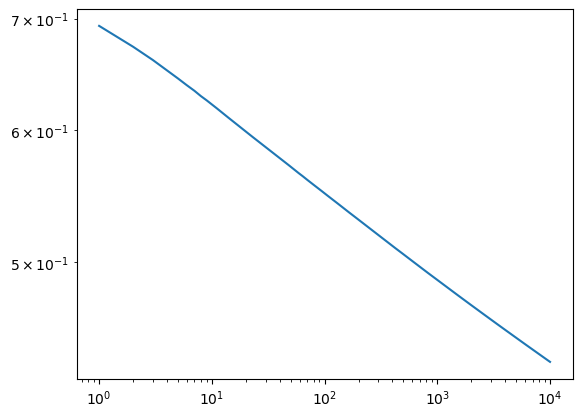

In [16]:
plt.loglog(df['t'], np.log(df['Ct']+1))
# plt.savefig('figs/Ct_a_09.png')
# plt.close()


![Ct_a_09.png](figs/Ct_a_09.png)

In [17]:
df = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.5_sample10K.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.965886
2,3,0.946357
3,4,0.933927
4,5,0.924876


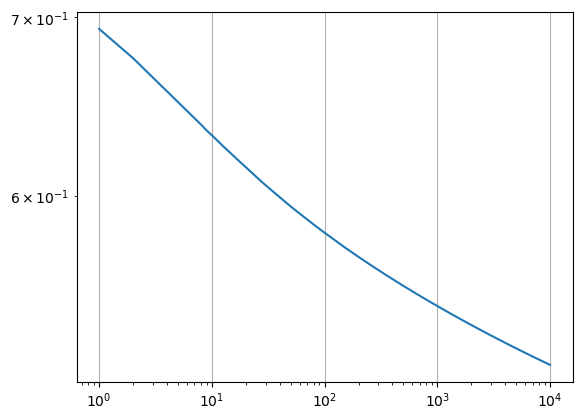

In [26]:
plt.loglog(df['t'], np.log(df['Ct']+1))
plt.grid()
# plt.xscale('log')
# plt.savefig('figs/Ct_a_05.png')
# plt.close()


In [21]:
df = pd.read_csv('../data/Ct/T10K_p0.9_q0.5_alpha0.7_sample10K.csv')
df.head()


,t,Ct
0,1,1.000000
1,2,0.965658
2,3,0.943706
3,4,0.928365
4,5,0.916948


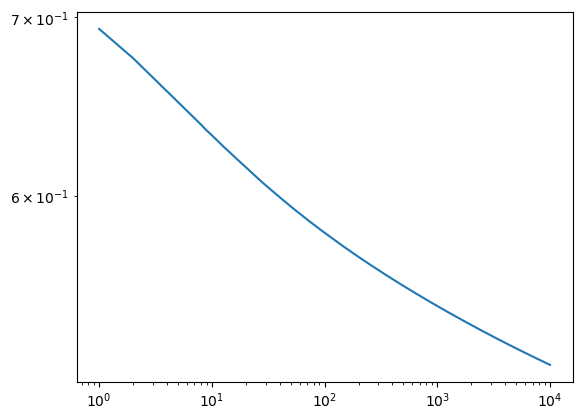

In [22]:
plt.loglog(df['t'], np.log(df['Ct']+1))
# plt.xscale('log')
# plt.savefig('figs/Ct_a_05.png')
# plt.close()
